# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [1]:
import sqlite3

sqlite_db = '../../assets/datasets/adult.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()

In [9]:
cols = c.execute("PRAGMA table_info('adult')").fetchall()
adult_cols = [x[1] for x in cols]

In [10]:
import pandas as pd
df = pd.DataFrame(c.execute("SELECT * from adult").fetchall(), columns = adult_cols)

In [14]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [22]:
# df.info()
# df = df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education-num     45222 non-null int64
marital-status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital-gain      45222 non-null int64
capital-loss      45222 non-null int64
hours-per-week    45222 non-null int64
native-country    45222 non-null object
salary            45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [23]:
df['target'] = df['salary'].map(lambda x: 1 if x == ">50K" else 0)

In [27]:
df[['target']] = df[['target']].astype(int)

In [30]:
df.target.value_counts()

0    34014
1    11208
Name: target, dtype: int64

### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

> Some and some

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

In [38]:
df[['age','target']].corr()

,age,target
age,1.00000,0.23704
target,0.23704,1.00000


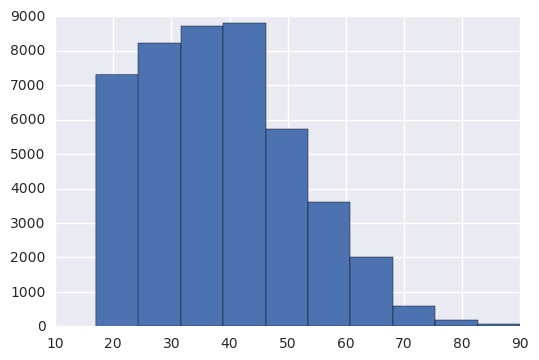

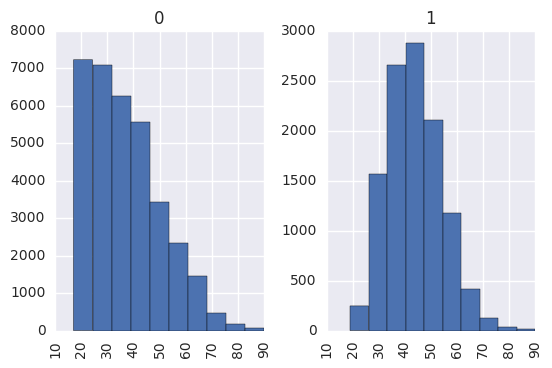

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

df.age.hist()
plt.show()
df.age.hist(by=df.target)
plt.show()


The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

In [50]:
df["workclass"].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

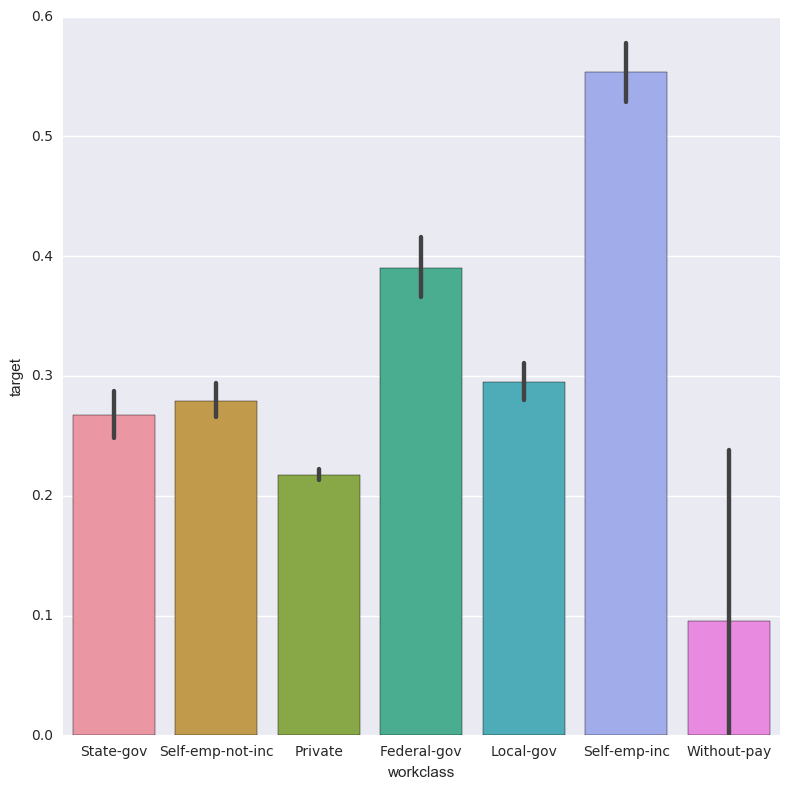

In [66]:
import seaborn as sns

sns.factorplot(x="workclass", y = 'target', data=df, kind="bar", size=8)

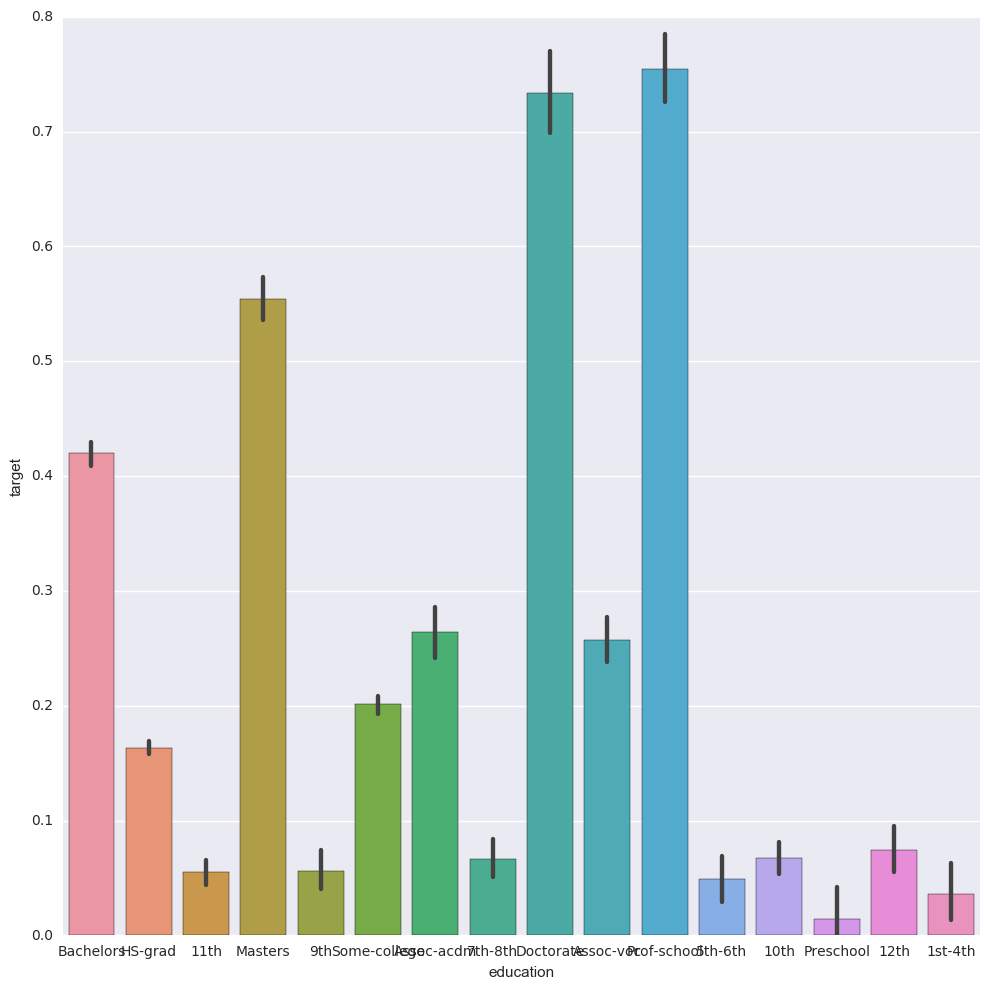

In [62]:
sns.factorplot(x="education", y = 'target', data=df, kind="bar", size=10)

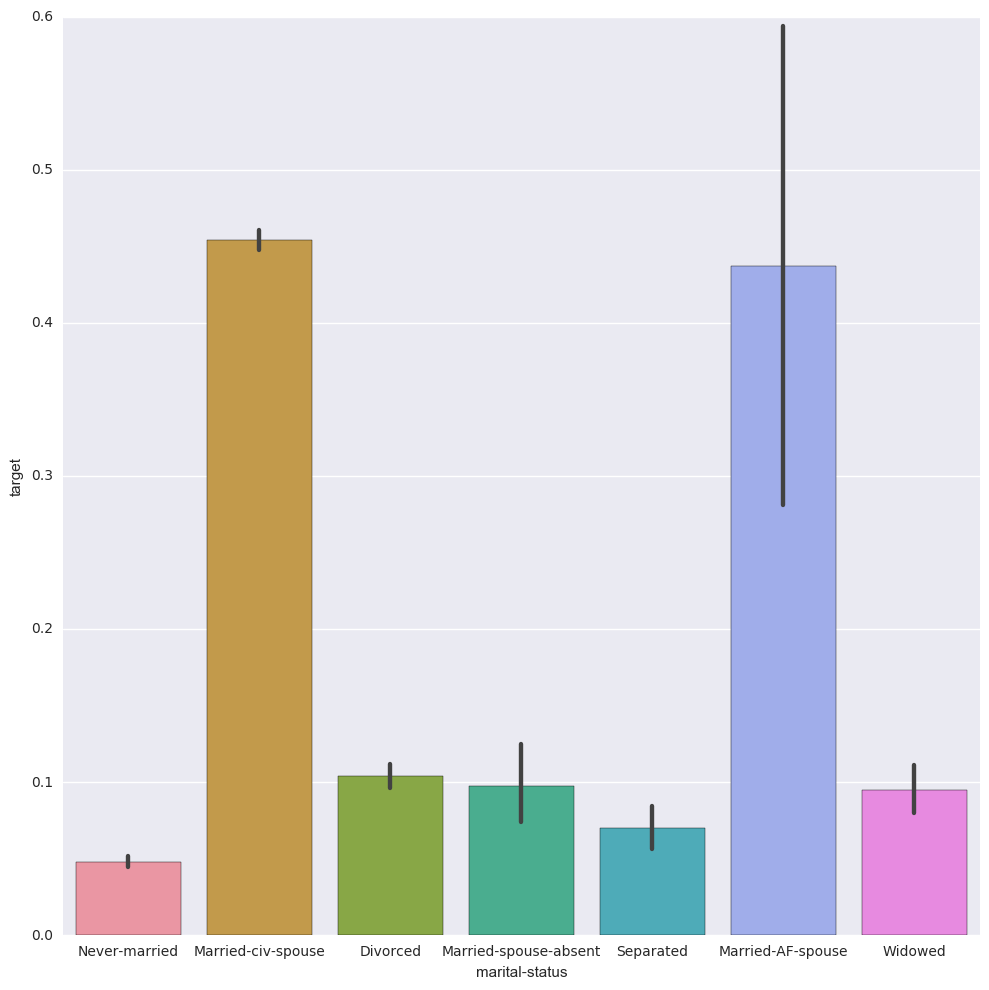

In [67]:
sns.factorplot(x="marital-status", y = 'target', data=df, kind="bar", size=10)

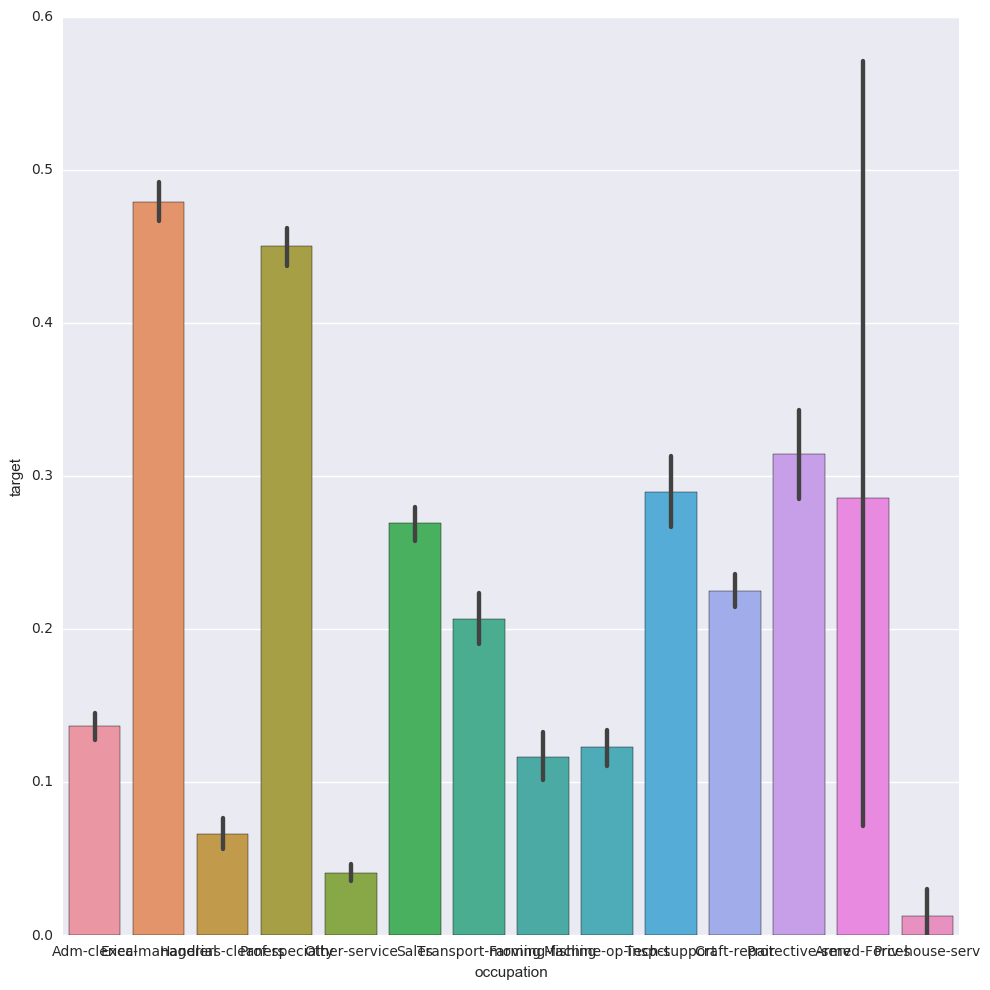

In [68]:
sns.factorplot(x="occupation", y = 'target', data=df, kind="bar", size=10)

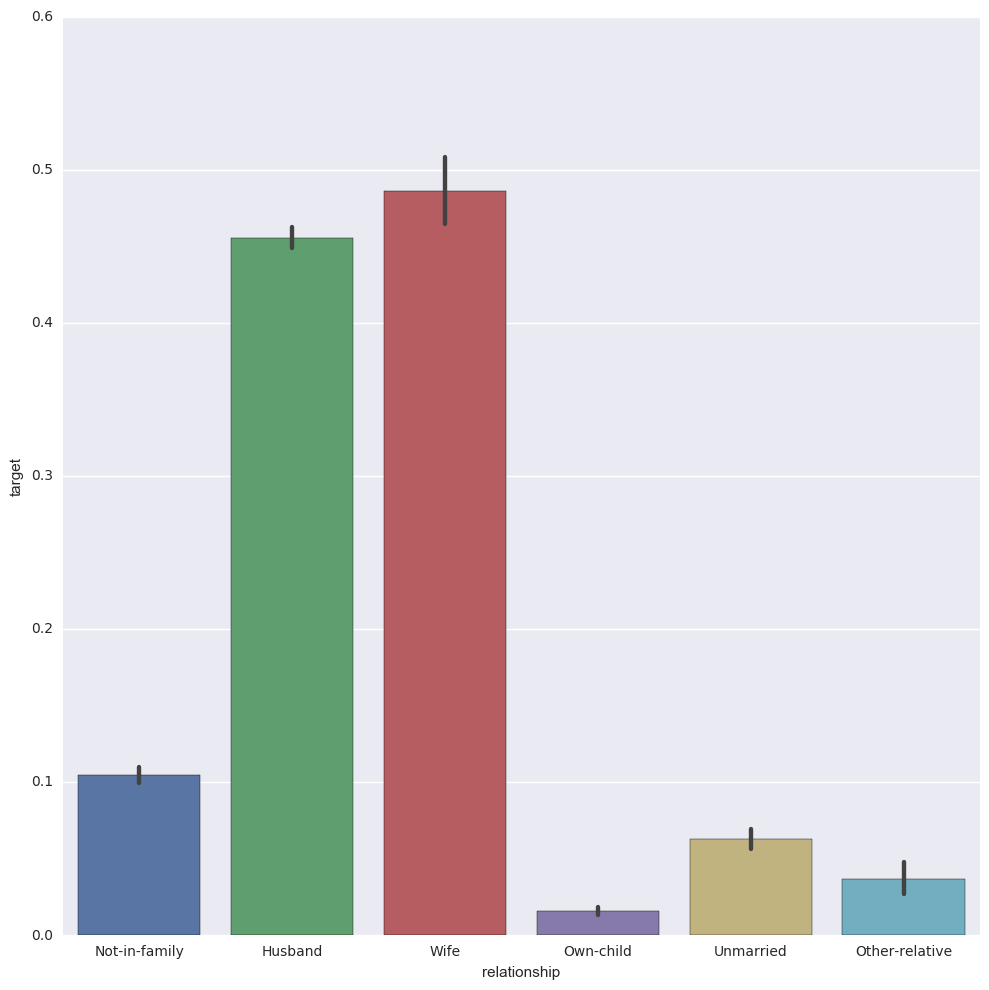

In [69]:
sns.factorplot(x="relationship", y = 'target', data=df, kind="bar", size=10)

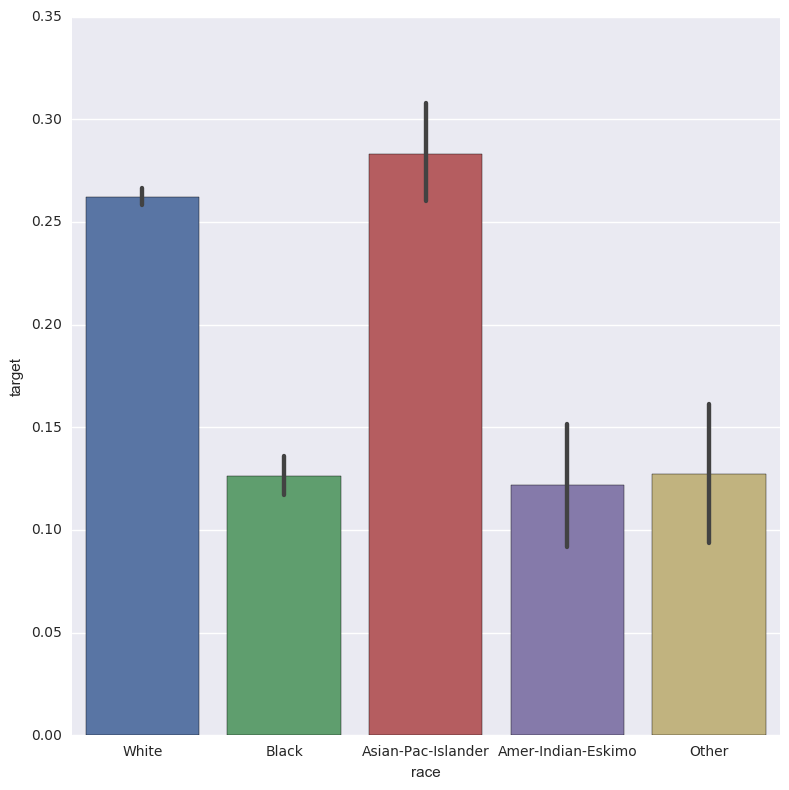

In [73]:
sns.factorplot(x="race", y = 'target', data=df, kind="bar", size=8)

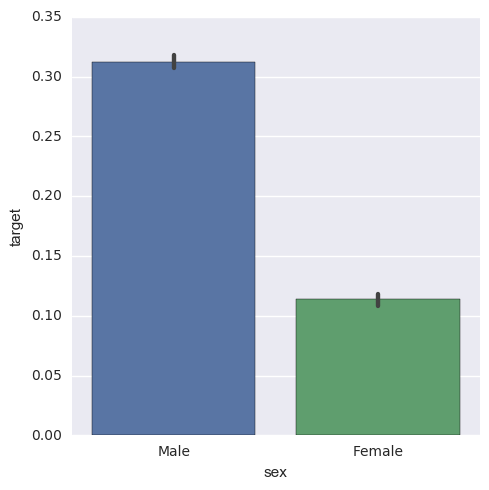

In [72]:
sns.factorplot(x="sex", y = 'target', data=df, kind="bar", size=5)

### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

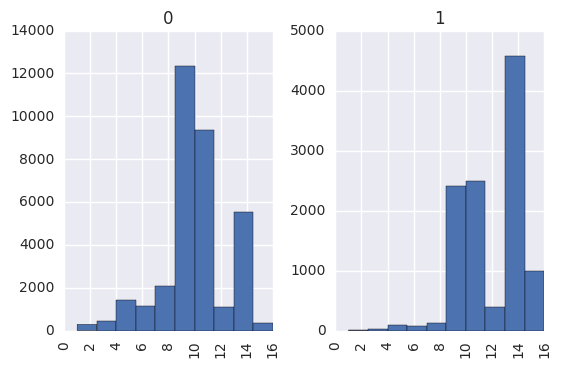

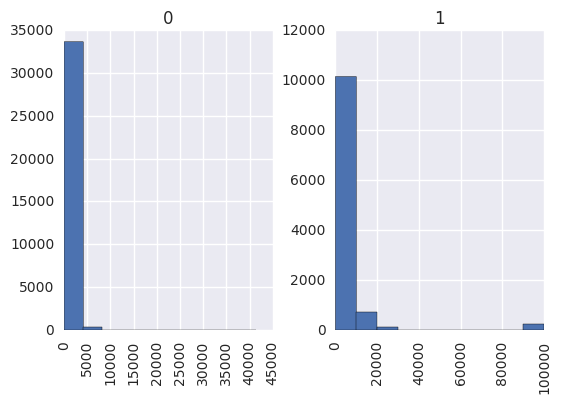

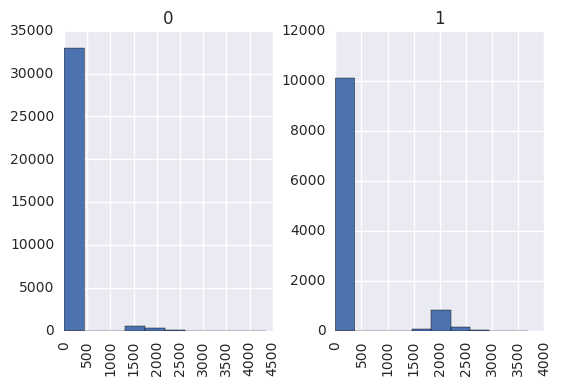

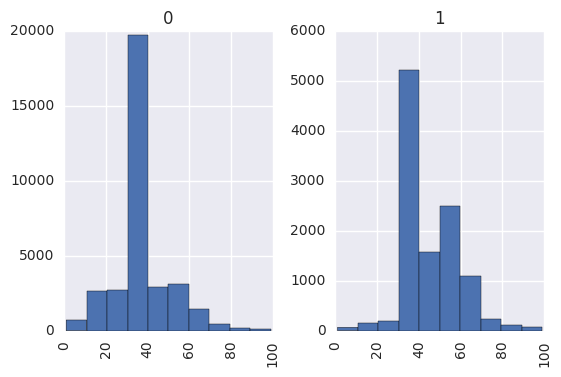

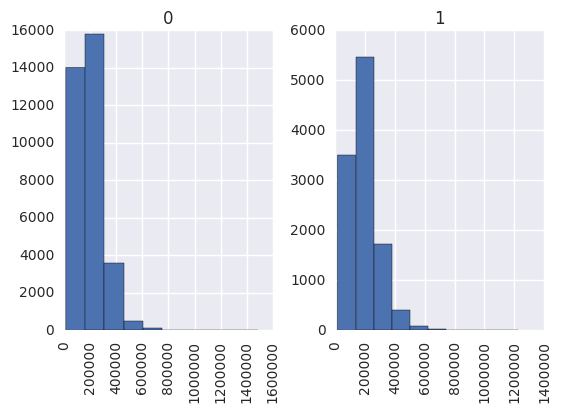

In [79]:
df["education-num"].hist(by=df.target)
plt.show()
df["capital-gain"].hist(by=df.target)
plt.show()
df["capital-loss"].hist(by=df.target)
plt.show()
df["hours-per-week"].hist(by=df.target)
plt.show()
df["fnlwgt"].hist(by=df.target)
plt.show()

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [93]:
dummies = pd.get_dummies(df[['workclass','education','marital-status','occupation','relationship','race','sex']])

# data = pd.concat([data, area_dummies], axis=1)
# data.head()


In [94]:
dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

In [115]:
ndf = df[['age','education-num','capital-gain','capital-loss','hours-per-week','target']]

In [117]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

ndf[['age','education-num','capital-gain','capital-loss','hours-per-week','target']] = scaler.fit_transform(ndf)

/Users/Shreyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Shreyas/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [118]:
ndf.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,target
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0


## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

In [ ]:
data = pd.concat([ndf, dummies], axis=1)

In [158]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams


In [127]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.cross_validation import cross_val_score, train_test_split

In [123]:
X = data.drop("target",axis=1)
y = data.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [139]:
logreg_cv = LogisticRegressionCV()

logreg_cv.fit(X_train, y_train)

logreg_cv.score(X_test,y_test)

y_pred = logreg_cv.predict(X_test)

In [145]:
print logreg_cv.score(X_test,y_test)

for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(logreg_cv, X_test, y_test, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

0.849571160547
mean accuracy: 0.850441916054, all: [ 0.85326633  0.85246231  0.8455971 ]
mean precision: 0.741147952798, all: [ 0.75401606  0.74950298  0.71992481]
mean recall: 0.612459546926, all: [ 0.60760518  0.61003236  0.6197411 ]
mean roc_auc: 0.906108535732, all: [ 0.90896457  0.90900958  0.90035146]


In [146]:
print confusion_matrix(y_test, y_pred)

[[10441   775]
 [ 1470  2238]]


## KNN models with different n

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [137]:
knn = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.81244974537657466

In [136]:
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.82156258375770574

In [138]:
knn = KNeighborsClassifier(n_neighbors=8,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.82712409541677834

## GridCV

In [148]:
from sklearn.grid_search import GridSearchCV
logreg = LogisticRegression()
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty':penalties, 'C':C_vals}, verbose=True, cv=5, scoring='accuracy')
gs.fit(X, y)

/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  6.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy',
       verbose=True)

In [151]:
gs.best_params_

{'C': 0.75, 'penalty': 'l1'}

In [153]:
logreg = LogisticRegression(C=0.75, penalty='l1')

logreg.fit(X_train, y_train)



mean accuracy: 0.850441916054, all: [ 0.85326633  0.85246231  0.8455971 ]
mean precision: 0.741147952798, all: [ 0.75401606  0.74950298  0.71992481]
mean recall: 0.612459546926, all: [ 0.60760518  0.61003236  0.6197411 ]
mean roc_auc: 0.906108535732, all: [ 0.90896457  0.90900958  0.90035146]


In [154]:
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(logreg, X_test, y_test, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

mean accuracy: 0.850240897558, all: [ 0.85346734  0.8518593   0.84539606]
mean precision: 0.742009596864, all: [ 0.75528701  0.75025075  0.72049103]
mean recall: 0.609762675297, all: [ 0.60679612  0.60517799  0.61731392]
mean roc_auc: 0.906263330331, all: [ 0.90953669  0.90881678  0.90043652]


In [156]:
y_pred = logreg.predict(X_test)

print confusion_matrix(y_test, y_pred)

[[10444   772]
 [ 1468  2240]]


In [157]:
print(classification_report(y_test, y_pred)), "\n"

             precision    recall  f1-score   support

        0.0       0.88      0.93      0.90     11216
        1.0       0.74      0.60      0.67      3708

avg / total       0.84      0.85      0.84     14924


